The Toolkit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import joblib

Load & Analyze

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


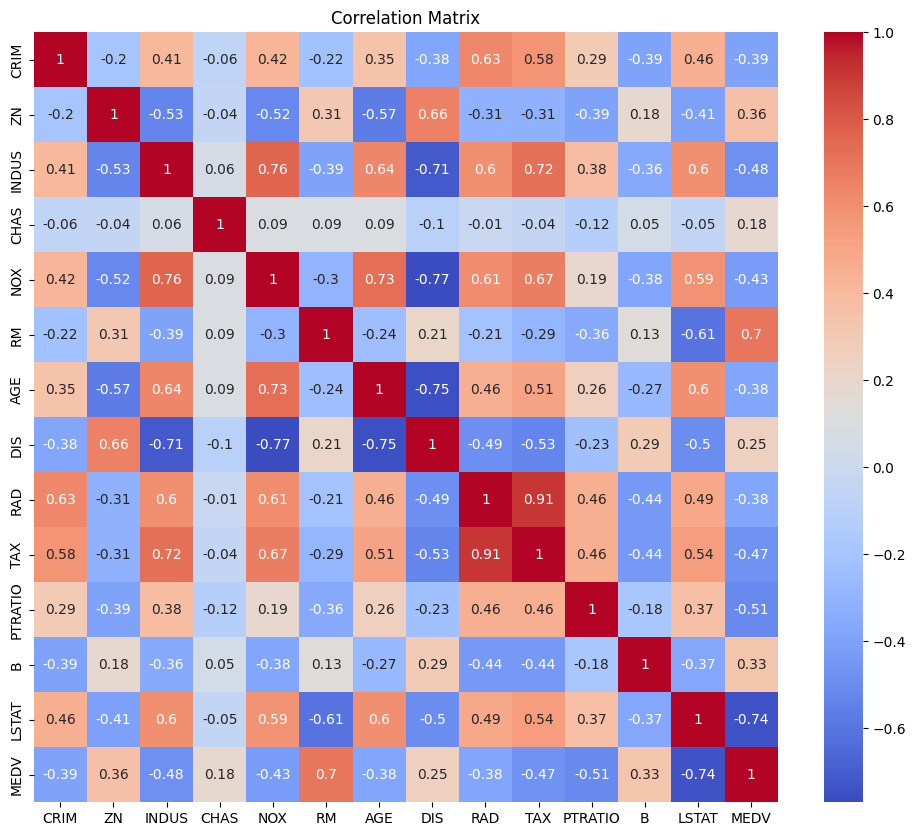

In [3]:
# 1. Load the file
df = pd.read_csv('/content/drive/MyDrive/machine learning/housing.csv')

# 2. Check the first few rows to ensure it loaded correctly
print(df.head())

# 3. Correlation Matrix & Heatmap
plt.figure(figsize=(12, 10))
# .corr() calculates relationship strength (-1 to 1) for every pair of columns
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Feature Engineering

In [4]:
# Create the Interaction Term
# Logic: The impact of a room (RM) depends on the neighborhood status (LSTAT)
df['RM_LSTAT'] = df['RM'] * df['LSTAT']

# Select specific columns we want to use
features = ['RM', 'LSTAT', 'PTRATIO', 'RM_LSTAT']
X = df[features]  # The Inputs (Questions)
y = df['MEDV']    # The Target (Answer)

Splitting & Scaling

In [5]:
# 1. Split Data
# test_size=0.2 means 20% of data is hidden for the final exam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale Data
scaler = StandardScaler()

# fit_transform on TRAIN: "Learn the average, then subtract it."
X_train_scaled = scaler.fit_transform(X_train)

# transform on TEST: "Subtract the average you learned from the TRAIN set."
# CRITICAL: Do NOT fit on the test set, or you are cheating (Data Leakage).
X_test_scaled = scaler.transform(X_test)

Training & Evaluation

In [6]:
# 1. Train
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Find the best line that fits the dots

# 2. Evaluate
y_pred = model.predict(X_test_scaled) # Ask model to guess prices for the hidden 20%

# 3. Grade the model
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {score:.4f}")
print(f"RMSE: {rmse:.2f}")

R2 Score: 0.7188
RMSE: 4.54


Serialization (Saving for Later)

In [7]:
# Save the model (the brain)
joblib.dump(model, 'boston_model_final.pkl')

# Save the scaler (the translator)
# We MUST save this because the model expects scaled numbers (inputs around 0).
# If we feed it raw numbers (e.g., 300 tax), it will fail.
joblib.dump(scaler, 'boston_scaler_final.pkl')

['boston_scaler_final.pkl']